# Credit Card Fraud Detection
### Dataset link :- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.Class.value_counts()

0.0    23769
1.0       88
Name: Class, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


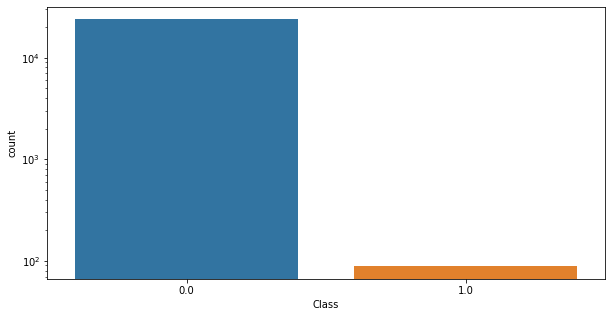

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(df['Class'], log=True);

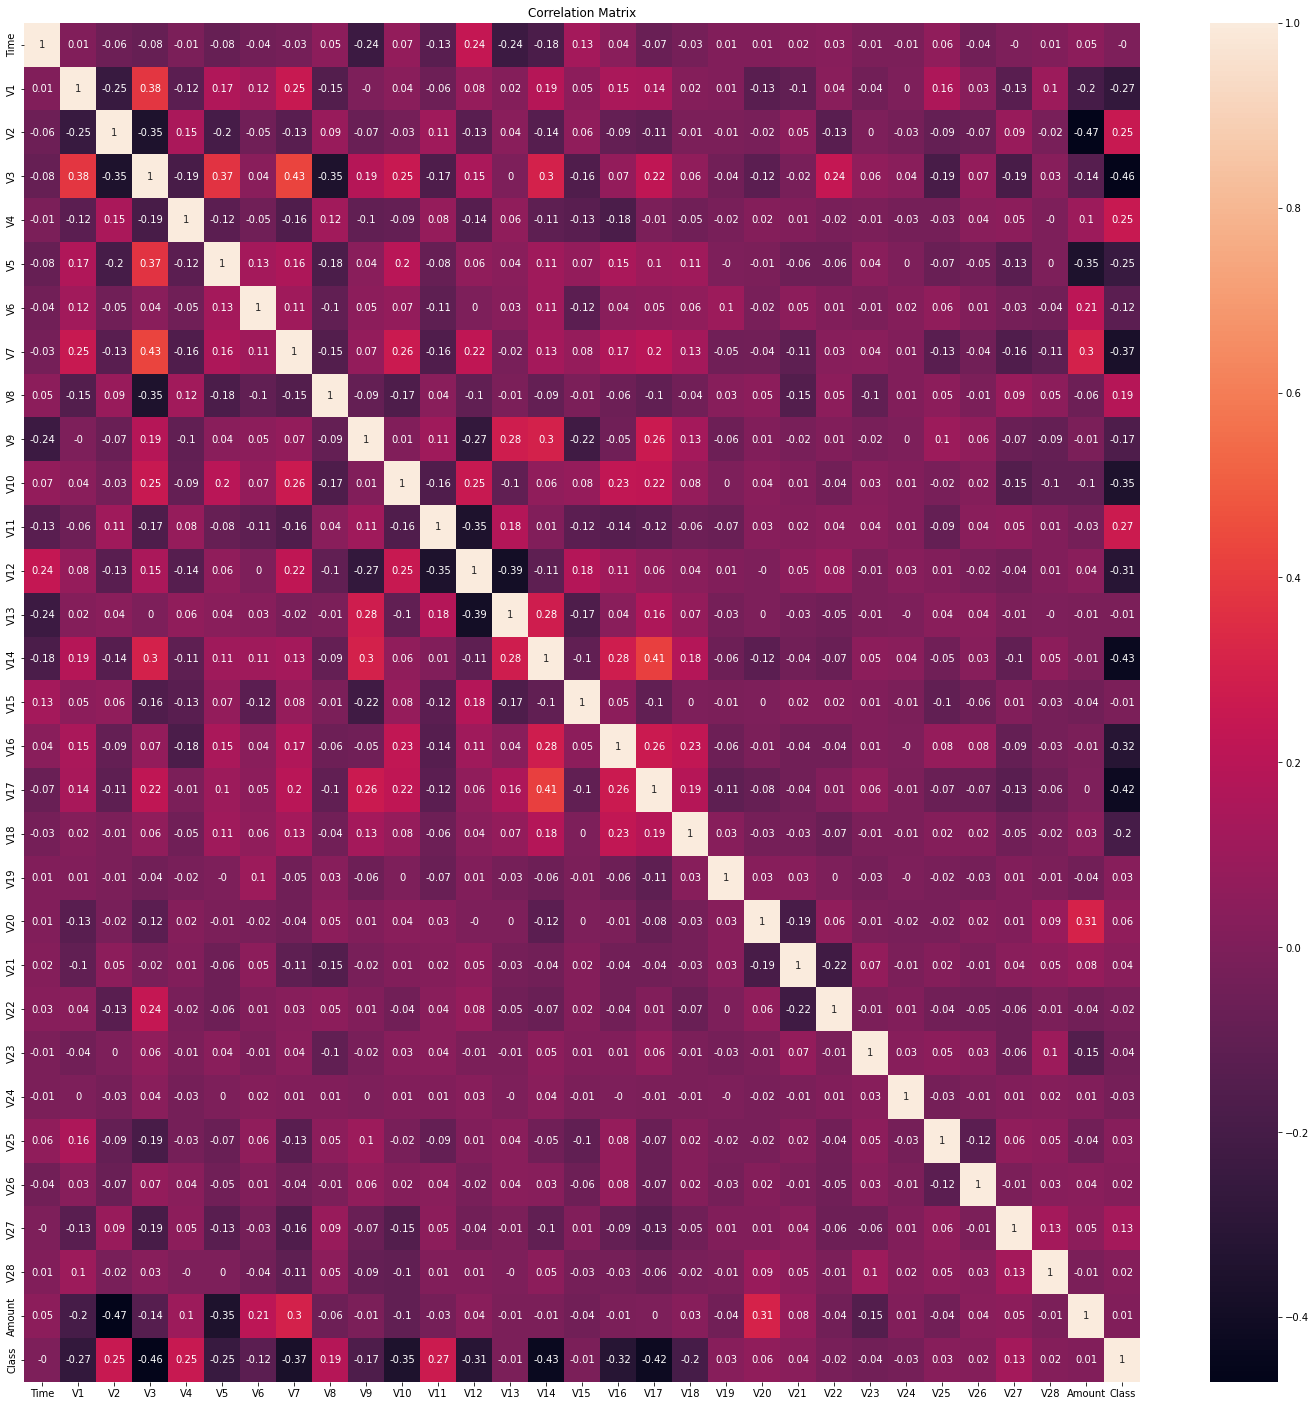

In [ ]:
plt.figure(figsize=(25,25))
plt.title("Correlation Matrix")
sns.heatmap(round(df.corr(), 2), annot=True);

In [ ]:
df.corr()[['Class']].sort_values(by='Class')[:-1]

,Class
V3,-0.456776
V14,-0.427726
V17,-0.417540
V7,-0.372770
V10,-0.351050
V16,-0.316954
V12,-0.314432
V1,-0.269010
V5,-0.246737
V18,-0.195112


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [ ]:
sc=StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(17892, 30)
(5965, 30)


In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred = lg.predict(X_test)

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5939
         1.0       1.00      0.62      0.76        26

    accuracy                           1.00      5965
   macro avg       1.00      0.81      0.88      5965
weighted avg       1.00      1.00      1.00      5965

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9983235540653814
----------------------------------------------------------------------------------------------------



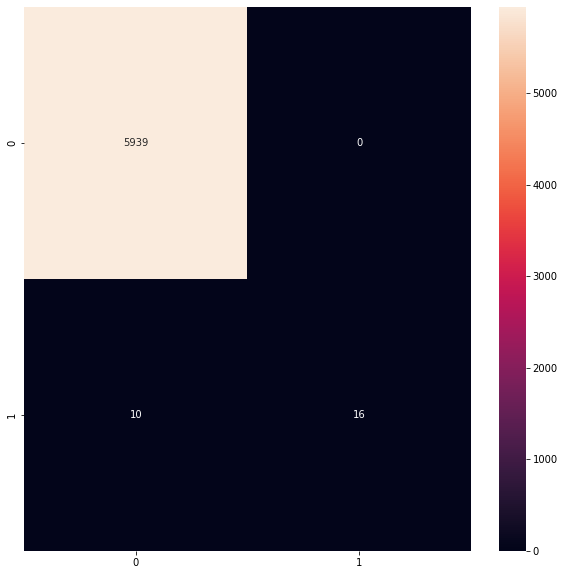

In [ ]:
print('Classification Report: \n', classification_report(y_test, pred))
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(y_test, pred))
print("-" * 100)
print()
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');